In [3]:
import pandas as pd 
import numpy as np

In [4]:
savant = pd.read_csv('C:/Users/brady/OneDrive/Documents/Reds Hackathon/savant_pitch_level.csv')

In [5]:
fangraph =  pd.read_csv('C:/Users/brady/OneDrive/Documents/Reds Hackathon/fangraphs_season_level.csv')

In [6]:
fg2021_22=fangraph.loc[fangraph['Season']!=2023]

In [7]:
fg2021_22['weightgmLI']=fg2021_22['IP']*fg2021_22['gmLI']

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\4056070012.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fg2021_22['weightgmLI']=fg2021_22['IP']*fg2021_22['gmLI']


In [8]:
by_pitcher = fg2021_22[['weightgmLI', 'IP','PlayerId']].groupby(by=['PlayerId'], as_index=False).sum()

In [9]:
by_pitcher['avggmLI']=by_pitcher['weightgmLI']/by_pitcher['IP']

In [10]:
by_pitcher

,PlayerId,weightgmLI,IP,avggmLI
0,18,4.245119,4.0,1.061280
1,1157,23.482195,30.1,0.780139
2,1159,0.000000,1.0,0.000000
3,1177,0.000000,1.0,0.000000
4,1246,85.325800,63.2,1.350092
...,...,...,...,...
1163,27681,29.513608,34.2,0.862971
1164,27691,20.545200,26.0,0.790200
1165,27779,44.824560,53.3,0.840986
1166,30074,24.534000,28.2,0.870000


In [11]:
by_pitcher_prep=by_pitcher[['PlayerId','avggmLI']]

In [12]:
merged= fangraph.merge(right=by_pitcher_prep,on='PlayerId',how='outer')

In [13]:
merge_no_start=merged.loc[merged['Role']!='SP']

In [14]:
merge_no_start['avggmLI'].describe()

count    1989.000000
mean        0.858063
std         0.433747
min         0.000000
25%         0.655122
50%         0.870000
75%         1.118579
max         2.613400
Name: avggmLI, dtype: float64

Data with our assigned roles

In [15]:
assigned_roles=pd.read_csv('C:/Users/brady/OneDrive/Documents/Reds Hackathon/roledata.csv')

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
seasons2122=assigned_roles.loc[assigned_roles['Season']!=2023]

In [18]:
season23=assigned_roles.loc[assigned_roles['Season']==2023]

In [19]:
season23

,X,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,GS,IP,TBF,W,L,CG,ShO,SV,BS,HLD,SD,MD,Pulls,ERA,R,ER,H,HR,SO,BB,IBB,HBP,WP,BK,Events,GB,LD,FB,IFFB,BU,IFH,BUH,Balls,Strikes,Pitches,RS,RS_per_9,K_pct,BB_pct,K_minus_BB_pct,K_per_9,BB_per_9,K_to_BB,H_per_9,HR_per_9,AVG,WHIP,BABIP,LOB_pct,GB_pct,LD_pct,FB_pct,IFFB_pct,GB_to_FB,HR_to_FB,IFH_pct,BUH_pct,FIP,xFIP,SIERA,tERA,kwERA,E_minus_F,RAR,WAR,Dollars,WPA,RE24,REW,pLI,inLI,gmLI,exLI,WPA_to_LI,Clutch,OSwing_pct,ZSwing_pct,Swing_pct,OContact_pct,ZContact_pct,Contact_pct,Zone_pct,FStrike_pct,SwStr_pct,CStr_pct,CSW_pct,ERA_minus,FIP_minus,xFIP_minus,Pace,RA9_WAR,BIP_Wins,LOB_Wins,FDP_Wins,Pull_pct,Cent_pct,Oppo_pct,Soft_pct,Med_pct,Hard_pct,TTO_pct,FRM,K_pct_plus,BB_pct_plus,K_per_9_plus,BB_per_9_plus,K_to_BB_plus,H_per_9_plus,HR_per_9_plus,AVG_plus,WHIP_plus,BABIP_plus,LOB_pct_plus,GB_pct_plus,LD_pct_plus,FB_pct_plus,HR_to_FB_pct_plus,Pull_pct_plus,Cent_pct_plus,Oppo_pct_plus,Med_pct_plus,Hard_pct_plus,EV,LA,Barrels,Barrel_pct,maxEV,HardHit,HardHit_pct,FA_pct,FAv,SL_pct,SLv,CT_pct,CTv,CB_pct,CBv,CH_pct,CHv,SF_pct,SFv,KN_pct,KNv,XX_pct,PO_pct,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB_per_c,wSL_per_c,wCT_per_c,wCB_per_c,wCH_per_c,wSF_per_c,wKN_per_c,FA_pct_sc,FC_pct_sc,FS_pct_sc,FO_pct_sc,SI_pct_sc,SL_pct_sc,CU_pct_sc,KC_pct_sc,EP_pct_sc,CH_pct_sc,SC_pct_sc,KN_pct_sc,UN_pct_sc,vFA_sc,vFC_sc,vFS_sc,vFO_sc,vSI_sc,vSL_sc,vCU_sc,vKC_sc,vEP_sc,vCH_sc,vSC_sc,vKN_sc,FA_X_sc,FC_X_sc,FS_X_sc,FO_X_sc,SI_X_sc,SL_X_sc,CU_X_sc,KC_X_sc,EP_X_sc,CH_X_sc,SC_X_sc,KN_X_sc,FA_Z_sc,FC_Z_sc,FS_Z_sc,FO_Z_sc,SI_Z_sc,SL_Z_sc,CU_Z_sc,KC_Z_sc,EP_Z_sc,CH_Z_sc,SC_Z_sc,KN_Z_sc,wFA_sc,wFC_sc,wFS_sc,wFO_sc,wSI_sc,wSL_sc,wCU_sc,wKC_sc,wEP_sc,wCH_sc,wSC_sc,wKN_sc,wFA_per_c_sc,wFC_per_c_sc,wFS_per_c_sc,wFO_per_c_sc,wSI_per_c_sc,wSL_per_c_sc,wCU_per_c_sc,wKC_per_c_sc,wEP_per_c_sc,wCH_per_c_sc,wSC_per_c_sc,wKN_per_c_sc,OSwing_pct_sc,ZSwing_pct_sc,Swing_pct_sc,OContact_pct_sc,ZContact_pct_sc,Contact_pct_sc,Zone_pct_sc,botERA,botOvr_CH,botStf_CH,botCmd_CH,botOvr_CU,botStf_CU,botCmd_CU,botOvr_FA,botStf_FA,botCmd_FA,botOvr_SI,botStf_SI,botCmd_SI,botOvr_SL,botStf_SL,botCmd_SL,botOvr_KC,botStf_KC,botCmd_KC,botOvr_FC,botStf_FC,botCmd_FC,botOvr_FS,botStf_FS,botCmd_FS,botOvr,botStf,botCmd,botxRV100,Stf_plus_CH,Loc_plus_CH,Pit_plus_CH,Stf_plus_CU,Loc_plus_CU,Pit_plus_CU,Stf_plus_FA,Loc_plus_FA,Pit_plus_FA,Stf_plus_SI,Loc_plus_SI,Pit_plus_SI,Stf_plus_SL,Loc_plus_SL,Pit_plus_SL,Stf_plus_KC,Loc_plus_KC,Pit_plus_KC,Stf_plus_FC,Loc_plus_FC,Pit_plus_FC,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,weightgmLI,avggmLI,IP_per_G,Assigned_Role
1,3,1157,488984,Tommy Hunter,Tommy Hunter,R,2023,36,NYM,RP,14,0,23.2,106,0,1,0,0,0,0,1,1,4,8,6.845061,20,18,28,6,20,5,0,2,0,0,79,37,10,32,1,0,3,0,117,251,368,16,6.084498,0.1887,0.0472,0.1415,7.605623,1.901406,4.0000,10.647872,2.281687,0.282828,1.394364,0.301370,0.5639,0.468354,0.126582,0.405063,0.031250,1.156250,0.187500,0.081081,0.000000,5.747994,4.687740,4.022362,4.642953,4.520617,1.097067,-3.003590,-0.290334,-2.322670,-0.430858,-9.0960,-0.914462,0.435751,0.354823,0.611500,0.710050,-0.350132,-0.638639,0.3302,0.7613,0.5123,0.8143,0.8475,0.8351,0.4223,0.6887,0.0842,0.1685,0.2527,164.123831,133.063646,107.048763,18.3870,-0.630813,-0.039543,-0.300936,-0.340479,0.5063,0.2785,0.2152,0.1519,0.4937,0.3544,0.2925,0.35000,84.752426,54.504666,88.604172,56.981715,155.496201,123.139491,185.923207,113.764758,104.718163,101.423524,78.544000,108.510070,62.397915,110.820182,144.808888,123.038761,80.191494,89.212667,95.580963,108.000094,88.597088,6.432798,10,0.1266,110.654,34,0.4304,0.4687,92.1279,NaN,NaN,0.3134,90.2000,0.1417,83.5385,0.0763,86.3214,NaN,NaN,NaN,NaN,0.0027,NaN,3.456690,NaN,-3.337920,-3.78841,-1.91098,NaN,NaN,2.009704,NaN,-2.902539,-7.285404,-6.824929,NaN,NaN,0.0790,0.3134,NaN,NaN,0.3924,NaN,0.1417,NaN,NaN,0.0736,NaN,NaN,NaN,92.386205,90.119132,NaN,NaN,92.000692,NaN,83.553842,NaN,NaN,86.251854,NaN,NaN,-4.106448,0.075925,NaN,NaN,-8.086

**Making Pitch Mix**

We wanted to see how many pitches each pitcher had in there mix, to be included in their mix it had to be thrown for at least 5% of their pitches

In [20]:
mix_21 = savant.loc[savant['game_year']==2021]
mix_22 = savant.loc[savant['game_year']==2022]

In [21]:
mix_23 = savant.loc[savant['game_year']==2023]

In [22]:
pitches21=mix_21[['pitch_type', 'pitcher', 'batter']].groupby(['pitcher', 'pitch_type'], as_index=False).count()
pitches22=mix_22[['pitch_type', 'pitcher', 'batter']].groupby(['pitcher', 'pitch_type'], as_index=False).count()

In [23]:
pitches23=mix_23[['pitch_type', 'pitcher', 'batter']].groupby(['pitcher', 'pitch_type'], as_index=False).count()

In [24]:
pitcher_mix21=pitches21.pivot(index='pitcher',columns='pitch_type', values=['batter'])
pitcher_mix22=pitches22.pivot(index='pitcher',columns='pitch_type', values=['batter'])

In [25]:
pitcher_mix23=pitches23.pivot(index='pitcher',columns='pitch_type', values=['batter'])

In [26]:
pitcher_mix21.fillna(0, inplace=True)
pitcher_mix22.fillna(0, inplace=True)


In [27]:
pitcher_mix23.fillna(0, inplace=True)

In [28]:
pitcher_mix21.reset_index(inplace=True)
pitcher_mix22.reset_index(inplace=True)

In [29]:
pitcher_mix23.reset_index(inplace=True)

In [30]:
pitcher_mix21.columns = pitcher_mix21.columns.map('_'.join)
pitcher_mix22.columns = pitcher_mix22.columns.map('_'.join)

In [31]:
pitcher_mix23.columns = pitcher_mix23.columns.map('_'.join)

In [32]:
pitcher_mix21['num_mix']=0
pitcher_mix22['num_mix']=0

In [33]:
pitcher_mix23['num_mix']=0

In [34]:
pitcher_mix21['Total_pitches']=pitcher_mix21['batter_CH']+pitcher_mix21['batter_CS']+pitcher_mix21['batter_CU']+pitcher_mix21['batter_EP']+pitcher_mix21['batter_FA']+pitcher_mix21['batter_FC']+pitcher_mix21['batter_FF']+pitcher_mix21['batter_KC']+pitcher_mix21['batter_KN']+pitcher_mix21['batter_PO']+pitcher_mix21['batter_SI']+pitcher_mix21['batter_SL']+pitcher_mix21['batter_ST']+pitcher_mix21['batter_SV']


In [35]:
pitcher_mix22['Total_pitches']=pitcher_mix22['batter_CH']+pitcher_mix22['batter_CS']+pitcher_mix22['batter_CU']+pitcher_mix22['batter_EP']+pitcher_mix22['batter_FA']+pitcher_mix22['batter_FC']+pitcher_mix22['batter_FF']+pitcher_mix22['batter_KC']+pitcher_mix22['batter_KN']+pitcher_mix22['batter_PO']+pitcher_mix22['batter_SI']+pitcher_mix22['batter_SL']+pitcher_mix22['batter_ST']+pitcher_mix22['batter_SV']

In [36]:
pitcher_mix23['Total_pitches']=pitcher_mix23['batter_CH']+pitcher_mix23['batter_CS']+pitcher_mix23['batter_CU']+pitcher_mix23['batter_EP']+pitcher_mix23['batter_FA']+pitcher_mix23['batter_FC']+pitcher_mix23['batter_FF']+pitcher_mix23['batter_KC']+pitcher_mix23['batter_KN']+pitcher_mix23['batter_PO']+pitcher_mix23['batter_SI']+pitcher_mix23['batter_SL']+pitcher_mix23['batter_ST']+pitcher_mix23['batter_SV']

In [37]:
def if_in_mix(df):
    pitch_types = ['batter_CH','batter_CS', 'batter_CU','batter_EP', 'batter_FA', 'batter_FC','batter_FF','batter_KN','batter_PO','batter_SI','batter_SL','batter_ST','batter_SV' ]
    mix_num=0
    ind=df.shape[1]-2

    for pitcher in df.index:
        for ball in pitch_types:
            if (df.iloc[pitcher][ball]/df.iloc[pitcher]['Total_pitches'])>=.1:
                mix_num+=1

        df.iloc[pitcher,ind]=mix_num

        mix_num=0


In [38]:
if_in_mix(pitcher_mix21)


In [39]:
if_in_mix(pitcher_mix22)

In [40]:
if_in_mix(pitcher_mix23)

In [41]:
pm21=pitcher_mix21[['pitcher_', 'num_mix']]
pm22=pitcher_mix22[['pitcher_', 'num_mix']]


In [42]:
pm23=pitcher_mix23[['pitcher_', 'num_mix']]

In [43]:
pm21['season']=2021
pm22['season']=2022

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\926172483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm21['season']=2021
C:\Users\brady\AppData\Local\Temp\ipykernel_34880\926172483.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm22['season']=2022


In [44]:
pm23['season']=2023

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\559432142.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pm23['season']=2023


In [45]:
pm = pd.concat([pm21, pm22], ignore_index=True)

In [46]:
seasons2122=seasons2122.merge(right=pm,right_on=['pitcher_','season'],left_on=['MLBAMID','Season'],how='inner')


In [47]:
season23=season23.merge(right=pm23,right_on=['season', 'pitcher_'], left_on=['Season','MLBAMID'],how='inner' )

In [48]:
seasons2122.drop(columns=['pitcher_','season'], inplace=True)

In [49]:
season23.drop(columns=['pitcher_','season'], inplace=True)

**Stamina**

To examine stamina of a pitcher, we wanted to see how a pitchers FB velocity change over the length of an appearance



In [50]:

only_fb=savant[savant['pitch_type'].isin(['FA','FC', 'FF','SI'])]

In [51]:
from numpy.polynomial import Polynomial

In [52]:
only_fb_21 = only_fb.loc[only_fb['game_year']==2021]
only_fb_22 = only_fb.loc[only_fb['game_year']==2022]

In [53]:
only_fb_23 = only_fb.loc[only_fb['game_year']==2023]

In [54]:

only_fb_21.dropna(subset=['release_speed'], inplace=True)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1820392562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_fb_21.dropna(subset=['release_speed'], inplace=True)


In [55]:
only_fb_22.dropna(subset=['release_speed'], inplace=True)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\2571124374.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_fb_22.dropna(subset=['release_speed'], inplace=True)


In [56]:
only_fb_23.dropna(subset=['release_speed'], inplace=True)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1075736125.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  only_fb_23.dropna(subset=['release_speed'], inplace=True)


In [57]:
def pitcher_stamina(df):
    pitchers = df['pitcher'].unique()
    slopes=[]
    pitchers_stamina={}
    for pitcher in pitchers:
       game_data=df.loc[(df['pitcher']==pitcher)]
       coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)
       slopes.append(coefficients[0])
       stam=sum(slopes)/len(slopes)
       pitchers_stamina[pitcher]=stam
       slopes=[]
    return pitchers_stamina

In [58]:
'''def pitcher_stamina(df):
    dates=df['game_date'].unique()
    pitchers = df['pitcher'].unique()
    slopes=[]
    pitchers_stamina={}
    for pitcher in pitchers:
        appearances=df.loc[df['pitcher']==pitcher]['game_date']
        for apps in appearances:
            for games in dates:
                if apps==games:
                    game_data=df.loc[(df['pitcher']==pitcher) & (df['game_date']==games)]
                    coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)
                    slopes.append(coefficients[0])
        stam=sum(slopes)/len(slopes)
        pitchers_stamina[pitcher]=stam
        slopes=[]
    return pitchers_stamina'''



"def pitcher_stamina(df):\n    dates=df['game_date'].unique()\n    pitchers = df['pitcher'].unique()\n    slopes=[]\n    pitchers_stamina={}\n    for pitcher in pitchers:\n        appearances=df.loc[df['pitcher']==pitcher]['game_date']\n        for apps in appearances:\n            for games in dates:\n                if apps==games:\n                    game_data=df.loc[(df['pitcher']==pitcher) & (df['game_date']==games)]\n                    coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)\n                    slopes.append(coefficients[0])\n        stam=sum(slopes)/len(slopes)\n        pitchers_stamina[pitcher]=stam\n        slopes=[]\n    return pitchers_stamina"

In [59]:
stam21=pitcher_stamina(only_fb_21)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1174641286.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)


In [60]:
stam22=pitcher_stamina(only_fb_22)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1174641286.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)
C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1174641286.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)
C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1174641286.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)
C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1174641286.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)


In [61]:
stam23=pitcher_stamina(only_fb_23)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1174641286.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)
C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1174641286.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)
C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1174641286.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)
C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1174641286.py:7: RankWarning: Polyfit may be poorly conditioned
  coefficients = np.polyfit(x=game_data['pitch_number_appearance'], y=game_data['release_speed'], deg=1)


In [62]:
pitchfb21=only_fb_21[['game_year', 'pitcher', 'game_type']].groupby(by=['game_year','pitcher'], as_index=False).count()

In [63]:
pitchfb22=only_fb_22[['game_year', 'pitcher', 'game_type']].groupby(by=['game_year','pitcher'], as_index=False).count()

In [64]:
pitchfb23=only_fb_23[['game_year', 'pitcher', 'game_type']].groupby(by=['game_year','pitcher'], as_index=False).count()

In [65]:
pitchfb21['stamina']=0

In [66]:
pitchfb22['stamina']=0

In [67]:
pitchfb23['stamina']=0

In [68]:
def dict_to_row(df, dictionary):
    pitchers=df['pitcher'].unique()
    for key in dictionary:
        for pitcher in pitchers:
            if key==pitcher:
                ind=df.loc[df['pitcher']==pitcher].index
                df.iloc[ind, 3]=dictionary[key]
        

In [69]:
dict_to_row(pitchfb21,stam21)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\2898604911.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.015869506530522395' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[ind, 3]=dictionary[key]


In [70]:
dict_to_row(pitchfb22,stam22)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\2898604911.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.000298701583150546' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[ind, 3]=dictionary[key]


In [71]:
dict_to_row(pitchfb23,stam23)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\2898604911.py:7: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '-0.021202268799025092' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.iloc[ind, 3]=dictionary[key]


In [72]:
pitchfb22.drop(columns=['game_type'], inplace=True)
pitchfb21.drop(columns=['game_type'], inplace=True)

In [73]:
pitchfb23.drop(columns=['game_type'], inplace=True)

In [74]:
pitchfb = pd.concat([pitchfb21, pitchfb22], ignore_index=True)

In [75]:
seasons2122=seasons2122.merge(right=pitchfb, right_on=['pitcher', 'game_year'], left_on=['MLBAMID','Season'], how='inner')

In [76]:
season23=season23.merge(right=pitchfb23, right_on=['pitcher','game_year'], left_on=['MLBAMID','Season'], how='inner' )

In [77]:
seasons2122.drop(columns=['pitcher', 'game_year'], inplace=True)

In [78]:
season23.drop(columns=['pitcher', 'game_year'], inplace=True)

WOBA LEFTY V RIGHT

In [79]:
splits=savant[['game_year','pitcher','woba_value', 'stand']].groupby(by=['game_year','pitcher', 'stand'], as_index=False).mean()

In [80]:
splits.loc[splits['pitcher']==672282]

,game_year,pitcher,stand,woba_value
1702,2021,672282,L,0.412500
1703,2021,672282,R,0.400000
3361,2022,672282,L,0.280833
3362,2022,672282,R,0.315632
4921,2023,672282,L,0.396667
4922,2023,672282,R,0.313511


In [81]:
splits21= splits.loc[splits['game_year']==2021]
splits22= splits.loc[splits['game_year']==2022]
splits23= splits.loc[splits['game_year']==2023]

In [82]:
s21=splits21.pivot(index='pitcher',columns='stand', values=['woba_value'])


In [83]:
s22=splits22.pivot(index='pitcher',columns='stand', values=['woba_value'])

In [84]:
s23=splits23.pivot(index='pitcher',columns='stand', values=['woba_value'])

In [85]:
s21

woba_value          
stand            L         R
pitcher                     
424144    0.300000  0.327273
425794    0.287089  0.269674
425844    0.251273  0.358649
429722    0.382174  0.300932
431148    0.558333  0.333333
...            ...       ...
681810    0.243182  0.262097
681867    0.625000  0.658333
681911    0.230000  0.275904
683232    0.363636  0.345968
685503    0.376316  0.431373

[909 rows x 2 columns]

In [86]:
s21.reset_index(inplace=True)
s22.reset_index(inplace=True)
s23.reset_index(inplace=True)

In [87]:
s21.columns = s21.columns.map('_'.join)
s22.columns = s22.columns.map('_'.join)
s23.columns = s23.columns.map('_'.join)

In [88]:
s22['season']=2022

In [89]:
s21['season']=2021

In [90]:
s23['season']=2023

In [91]:
s23['season']=s23['season'].astype('int64')

In [92]:
s23.dtypes

pitcher_          int64
woba_value_L    float64
woba_value_R    float64
season            int64
dtype: object

In [93]:
#season23['Season']=season23['Season'].astype(float)

In [94]:
season23['MLBAMID'].dtypes

dtype('int64')

In [95]:
seasplit = pd.concat([s21, s22], ignore_index=True)

In [96]:
seasons2122=seasons2122.merge(right=seasplit, right_on=['pitcher_', 'season'],left_on=['MLBAMID','Season'], how='inner' )

In [97]:
season23=season23.merge(right=s23, right_on=['pitcher_'], left_on=[ 'MLBAMID'], how='inner')

In [98]:
season23

,X,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,GS,IP,TBF,W,L,CG,ShO,SV,BS,HLD,SD,MD,Pulls,ERA,R,ER,H,HR,SO,BB,IBB,HBP,WP,BK,Events,GB,LD,FB,IFFB,BU,IFH,BUH,Balls,Strikes,Pitches,RS,RS_per_9,K_pct,BB_pct,K_minus_BB_pct,K_per_9,BB_per_9,K_to_BB,H_per_9,HR_per_9,AVG,WHIP,BABIP,LOB_pct,GB_pct,LD_pct,FB_pct,IFFB_pct,GB_to_FB,HR_to_FB,IFH_pct,BUH_pct,FIP,xFIP,SIERA,tERA,kwERA,E_minus_F,RAR,WAR,Dollars,WPA,RE24,REW,pLI,inLI,gmLI,exLI,WPA_to_LI,Clutch,OSwing_pct,ZSwing_pct,Swing_pct,OContact_pct,ZContact_pct,Contact_pct,Zone_pct,FStrike_pct,SwStr_pct,CStr_pct,CSW_pct,ERA_minus,FIP_minus,xFIP_minus,Pace,RA9_WAR,BIP_Wins,LOB_Wins,FDP_Wins,Pull_pct,Cent_pct,Oppo_pct,Soft_pct,Med_pct,Hard_pct,TTO_pct,FRM,K_pct_plus,BB_pct_plus,K_per_9_plus,BB_per_9_plus,K_to_BB_plus,H_per_9_plus,HR_per_9_plus,AVG_plus,WHIP_plus,BABIP_plus,LOB_pct_plus,GB_pct_plus,LD_pct_plus,FB_pct_plus,HR_to_FB_pct_plus,Pull_pct_plus,Cent_pct_plus,Oppo_pct_plus,Med_pct_plus,Hard_pct_plus,EV,LA,Barrels,Barrel_pct,maxEV,HardHit,HardHit_pct,FA_pct,FAv,SL_pct,SLv,CT_pct,CTv,CB_pct,CBv,CH_pct,CHv,SF_pct,SFv,KN_pct,KNv,XX_pct,PO_pct,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB_per_c,wSL_per_c,wCT_per_c,wCB_per_c,wCH_per_c,wSF_per_c,wKN_per_c,FA_pct_sc,FC_pct_sc,FS_pct_sc,FO_pct_sc,SI_pct_sc,SL_pct_sc,CU_pct_sc,KC_pct_sc,EP_pct_sc,CH_pct_sc,SC_pct_sc,KN_pct_sc,UN_pct_sc,vFA_sc,vFC_sc,vFS_sc,vFO_sc,vSI_sc,vSL_sc,vCU_sc,vKC_sc,vEP_sc,vCH_sc,vSC_sc,vKN_sc,FA_X_sc,FC_X_sc,FS_X_sc,FO_X_sc,SI_X_sc,SL_X_sc,CU_X_sc,KC_X_sc,EP_X_sc,CH_X_sc,SC_X_sc,KN_X_sc,FA_Z_sc,FC_Z_sc,FS_Z_sc,FO_Z_sc,SI_Z_sc,SL_Z_sc,CU_Z_sc,KC_Z_sc,EP_Z_sc,CH_Z_sc,SC_Z_sc,KN_Z_sc,wFA_sc,wFC_sc,wFS_sc,wFO_sc,wSI_sc,wSL_sc,wCU_sc,wKC_sc,wEP_sc,wCH_sc,wSC_sc,wKN_sc,wFA_per_c_sc,wFC_per_c_sc,wFS_per_c_sc,wFO_per_c_sc,wSI_per_c_sc,wSL_per_c_sc,wCU_per_c_sc,wKC_per_c_sc,wEP_per_c_sc,wCH_per_c_sc,wSC_per_c_sc,wKN_per_c_sc,OSwing_pct_sc,ZSwing_pct_sc,Swing_pct_sc,OContact_pct_sc,ZContact_pct_sc,Contact_pct_sc,Zone_pct_sc,botERA,botOvr_CH,botStf_CH,botCmd_CH,botOvr_CU,botStf_CU,botCmd_CU,botOvr_FA,botStf_FA,botCmd_FA,botOvr_SI,botStf_SI,botCmd_SI,botOvr_SL,botStf_SL,botCmd_SL,botOvr_KC,botStf_KC,botCmd_KC,botOvr_FC,botStf_FC,botCmd_FC,botOvr_FS,botStf_FS,botCmd_FS,botOvr,botStf,botCmd,botxRV100,Stf_plus_CH,Loc_plus_CH,Pit_plus_CH,Stf_plus_CU,Loc_plus_CU,Pit_plus_CU,Stf_plus_FA,Loc_plus_FA,Pit_plus_FA,Stf_plus_SI,Loc_plus_SI,Pit_plus_SI,Stf_plus_SL,Loc_plus_SL,Pit_plus_SL,Stf_plus_KC,Loc_plus_KC,Pit_plus_KC,Stf_plus_FC,Loc_plus_FC,Pit_plus_FC,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,weightgmLI,avggmLI,IP_per_G,Assigned_Role,num_mix,stamina,pitcher_,woba_value_L,woba_value_R,season
0,3,1157,488984,Tommy Hunter,Tommy Hunter,R,2023,36,NYM,RP,14,0,23.2,106,0,1,0,0,0,0,1,1,4,8,6.845061,20,18,28,6,20,5,0,2,0,0,79,37,10,32,1,0,3,0,117,251,368,16,6.084498,0.1887,0.0472,0.1415,7.605623,1.901406,4.0000,10.647872,2.281687,0.282828,1.394364,0.301370,0.5639,0.468354,0.126582,0.405063,0.031250,1.156250,0.187500,0.081081,0.000000,5.747994,4.687740,4.022362,4.642953,4.520617,1.097067,-3.003590,-0.290334,-2.322670,-0.430858,-9.0960,-0.914462,0.435751,0.354823,0.611500,0.710050,-0.350132,-0.638639,0.3302,0.7613,0.5123,0.8143,0.8475,0.8351,0.4223,0.6887,0.0842,0.1685,0.2527,164.123831,133.063646,107.048763,18.3870,-0.630813,-0.039543,-0.300936,-0.340479,0.5063,0.2785,0.2152,0.1519,0.4937,0.3544,0.2925,0.35000,84.752426,54.504666,88.604172,56.981715,155.496201,123.139491,185.923207,113.764758,104.718163,101.423524,78.544000,108.510070,62.397915,110.820182,144.808888,123.038761,80.191494,89.212667,95.580963,108.000094,88.597088,6.432798,10,0.1266,110.654,34,0.4304,0.4687,92.1279,NaN,NaN,0.3134,90.2000,0.1417,83.5385,0.0763,86.3214,NaN,NaN,NaN,NaN,0.0027,NaN,3.456690,NaN,-3.337920,-3.78841,-1.91098,NaN,NaN,2.009704,NaN,-2.902539,-7.285404,-6.824929,NaN,NaN,0.0790,0.3134,NaN,NaN,0.3924,NaN,0.1417,NaN,NaN,0.0736,NaN,NaN,NaN,92.386205,90.119132,NaN,NaN,92.000692,NaN,83.553842,N

In [99]:
seasons2122.drop(columns=['pitcher_','season'], inplace=True)

In [100]:
season23.drop(columns=['pitcher_','season'], inplace=True)

Merging In Runner on Off Splits

In [101]:
onbase=pd.read_csv('C:/Users/brady/OneDrive/Documents/Reds Hackathon/wOBAbyplayerbyyear.csv')

In [102]:
onbase

,pitcher,game_year,woba_mean_empty,woba_mean_runners
0,405395,2022,0.900000,0.725000
1,424144,2021,0.385714,0.270000
2,424144,2022,0.375000,0.564286
3,425794,2021,0.258922,0.310635
4,425794,2022,0.319809,0.296687
...,...,...,...,...
2638,695243,2023,0.229878,0.350862
2639,696136,2023,0.374390,0.268939
2640,696147,2023,0.316129,0.328889
2641,700363,2023,0.355303,0.258974


In [103]:
seasons2122=seasons2122.merge(right=onbase, right_on=['game_year', 'pitcher'], left_on=['Season','MLBAMID'],how='inner')

In [104]:
season23=season23.merge(right=onbase, right_on=['game_year','pitcher'], left_on=['Season', 'MLBAMID'],how='inner' )

In [105]:
seasons2122.drop(columns=['game_year', 'pitcher'], inplace=True)

In [106]:
season23.drop(columns=['game_year', 'pitcher'], inplace=True)

Efficiency 

In [107]:
seasons2122['Pitches_Per_Batter']=seasons2122['Pitches']/seasons2122['TBF']

In [108]:
season23['Pitches_Per_Batter']=season23['Pitches']/season23['TBF']

In [237]:
season23.loc[season23['NameASCII']=='Ian Hamilton']

,X,PlayerId,MLBAMID,Name,NameASCII,Throws,Season,Age,Team,Role,G,GS,IP,TBF,W,L,CG,ShO,SV,BS,HLD,SD,MD,Pulls,ERA,R,ER,H,HR,SO,BB,IBB,HBP,WP,BK,Events,GB,LD,FB,IFFB,BU,IFH,BUH,Balls,Strikes,Pitches,RS,RS_per_9,K_pct,BB_pct,K_minus_BB_pct,K_per_9,BB_per_9,K_to_BB,H_per_9,HR_per_9,AVG,WHIP,BABIP,LOB_pct,GB_pct,LD_pct,FB_pct,IFFB_pct,GB_to_FB,HR_to_FB,IFH_pct,BUH_pct,FIP,xFIP,SIERA,tERA,kwERA,E_minus_F,RAR,WAR,Dollars,WPA,RE24,REW,pLI,inLI,gmLI,exLI,WPA_to_LI,Clutch,OSwing_pct,ZSwing_pct,Swing_pct,OContact_pct,ZContact_pct,Contact_pct,Zone_pct,FStrike_pct,SwStr_pct,CStr_pct,CSW_pct,ERA_minus,FIP_minus,xFIP_minus,Pace,RA9_WAR,BIP_Wins,LOB_Wins,FDP_Wins,Pull_pct,Cent_pct,Oppo_pct,Soft_pct,Med_pct,Hard_pct,TTO_pct,FRM,K_pct_plus,BB_pct_plus,K_per_9_plus,BB_per_9_plus,K_to_BB_plus,H_per_9_plus,HR_per_9_plus,AVG_plus,WHIP_plus,BABIP_plus,LOB_pct_plus,GB_pct_plus,LD_pct_plus,FB_pct_plus,HR_to_FB_pct_plus,Pull_pct_plus,Cent_pct_plus,Oppo_pct_plus,Med_pct_plus,Hard_pct_plus,EV,LA,Barrels,Barrel_pct,maxEV,HardHit,HardHit_pct,FA_pct,FAv,SL_pct,SLv,CT_pct,CTv,CB_pct,CBv,CH_pct,CHv,SF_pct,SFv,KN_pct,KNv,XX_pct,PO_pct,wFB,wSL,wCT,wCB,wCH,wSF,wKN,wFB_per_c,wSL_per_c,wCT_per_c,wCB_per_c,wCH_per_c,wSF_per_c,wKN_per_c,FA_pct_sc,FC_pct_sc,FS_pct_sc,FO_pct_sc,SI_pct_sc,SL_pct_sc,CU_pct_sc,KC_pct_sc,EP_pct_sc,CH_pct_sc,SC_pct_sc,KN_pct_sc,UN_pct_sc,vFA_sc,vFC_sc,vFS_sc,vFO_sc,vSI_sc,vSL_sc,vCU_sc,vKC_sc,vEP_sc,vCH_sc,vSC_sc,vKN_sc,FA_X_sc,FC_X_sc,FS_X_sc,FO_X_sc,SI_X_sc,SL_X_sc,CU_X_sc,KC_X_sc,EP_X_sc,CH_X_sc,SC_X_sc,KN_X_sc,FA_Z_sc,FC_Z_sc,FS_Z_sc,FO_Z_sc,SI_Z_sc,SL_Z_sc,CU_Z_sc,KC_Z_sc,EP_Z_sc,CH_Z_sc,SC_Z_sc,KN_Z_sc,wFA_sc,wFC_sc,wFS_sc,wFO_sc,wSI_sc,wSL_sc,wCU_sc,wKC_sc,wEP_sc,wCH_sc,wSC_sc,wKN_sc,wFA_per_c_sc,wFC_per_c_sc,wFS_per_c_sc,wFO_per_c_sc,wSI_per_c_sc,wSL_per_c_sc,wCU_per_c_sc,wKC_per_c_sc,wEP_per_c_sc,wCH_per_c_sc,wSC_per_c_sc,wKN_per_c_sc,OSwing_pct_sc,ZSwing_pct_sc,Swing_pct_sc,OContact_pct_sc,ZContact_pct_sc,Contact_pct_sc,Zone_pct_sc,botERA,botOvr_CH,botStf_CH,botCmd_CH,botOvr_CU,botStf_CU,botCmd_CU,botOvr_FA,botStf_FA,botCmd_FA,botOvr_SI,botStf_SI,botCmd_SI,botOvr_SL,botStf_SL,botCmd_SL,botOvr_KC,botStf_KC,botCmd_KC,botOvr_FC,botStf_FC,botCmd_FC,botOvr_FS,botStf_FS,botCmd_FS,botOvr,botStf,botCmd,botxRV100,Stf_plus_CH,Loc_plus_CH,Pit_plus_CH,Stf_plus_CU,Loc_plus_CU,Pit_plus_CU,Stf_plus_FA,Loc_plus_FA,Pit_plus_FA,Stf_plus_SI,Loc_plus_SI,Pit_plus_SI,Stf_plus_SL,Loc_plus_SL,Pit_plus_SL,Stf_plus_KC,Loc_plus_KC,Pit_plus_KC,Stf_plus_FC,Loc_plus_FC,Pit_plus_FC,Stf_plus_FS,Loc_plus_FS,Pit_plus_FS,Stf_plus_FO,Loc_plus_FO,Pit_plus_FO,Stuff_plus,Location_plus,Pitching_plus,weightgmLI,avggmLI,IP_per_G,Assigned_Role,num_mix,stamina,woba_value_L,woba_value_R,woba_mean_empty,woba_mean_runners,Pitches_Per_Batter
277,1721,19261,641656,Ian Hamilton,Ian Hamilton,R,2023,28,NYY,RP,36,0,54.0,220,3,2,0,0,2,0,5,12,7,30,2.333333,16,14,39,1,64,25,1,3,1,0,128,73,27,28,4,0,3,0,341,573,914,24,4.0,0.2909,0.1136,0.1773,10.666667,4.166667,2.56,6.5,0.166667,0.203125,1.185185,0.299213,0.7774,0.570312,0.210938,0.21875,0.142857,2.607143,0.035714,0.041096,0.0,2.680966,3.297519,3.431653,2.864787,4.091457,-0.347632,10.5072,1.07528,8.60224,1.41187,15.544,1.52857,0.925433,0.781477,1.02436,1.1193,1.35949,0.166142,0.3339,0.6724,0.4643,0.5561,0.7712,0.6761,0.3853,0.5773,0.1499,0.1619,0.3118,55.659289,61.905894,76.933861,19.4313,1.26474,-0.052936,0.242392,0.189456,0.4063,0.3906,0.2031,0.2031,0.5156,0.2813,0.4091,0.716896,125.421586,133.212777,119.905826,127.354014,94.151573,77.2511,13.614556,83.620127,91.27833,102.033978,108.032407,136.222003,106.927236,56.956801,28.579888,99.003989,113.4812,82.758522,99.10815,86.648838,85.577347,4.34568,6,0.0469,110.93,48,0.375,0.4599,95.926,0.5401,88.187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0077,NaN,1.01829,10.9675,NaN,NaN,NaN,NaN,NaN,0.243029,2.229167,NaN,NaN,NaN,NaN,NaN,0.2195,NaN,NaN,NaN,0.2404,0.5401,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96.167998,NaN,NaN,NaN,95.607761,88.134353,NaN,NaN,NaN,NaN,NaN,NaN,-5.76395,NaN,NaN,NaN,-10.040274,-0.31175

Experimenting with Ideas

Prep for Regression

In [162]:
regression23=season23[['MLBAMID', 'NameASCII', 'Season','Pitches_Per_Batter','FIP_minus','Stuff_plus','Location_plus','num_mix', 'stamina', 'woba_value_L', 'woba_value_R','woba_mean_empty', 'woba_mean_runners','Age', 'Assigned_Role']]

In [163]:
regression2122=seasons2122[['MLBAMID', 'NameASCII', 'Season','Pitches_Per_Batter','FIP_minus','Stuff_plus','Location_plus','num_mix', 'stamina', 'woba_value_L', 'woba_value_R','woba_mean_empty', 'woba_mean_runners', 'Assigned_Role', 'ERA_minus','SIERA','Age']]

In [112]:
#regression2122.to_csv('C:/Users/brady/OneDrive/Documents/Reds Hackathon/regressiondata10%.csv')

In [164]:
regression2122.dropna(inplace=True)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1634653102.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression2122.dropna(inplace=True)


In [114]:
#regression23.to_csv('C:/Users/brady/OneDrive/Documents/Reds Hackathon/2023regression15%.csv')

In [236]:
regression23.loc[regression23['NameASCII']=='Ian Hamilton']

,MLBAMID,NameASCII,Season,Pitches_Per_Batter,FIP_minus,Stuff_plus,Location_plus,num_mix,stamina,woba_value_L,woba_value_R,woba_mean_empty,woba_mean_runners,Age,Assigned_Role,Predicted
277,641656,Ian Hamilton,2023,4.154545,61.905894,104.750933,97.013721,3,-0.009209,0.266972,0.291923,0.254918,0.307265,28,reliever,reliever


In [166]:
role_mapping = {'Long Low Leverage':'reliever', 'Short High Leverage':'reliever', 'Starter':'starter','Long High Leverage':'reliever','Short Low Leverage':'reliever'}

In [167]:
regression23['Assigned_Role']=regression23['Assigned_Role'].replace(role_mapping)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\3242900450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression23['Assigned_Role']=regression23['Assigned_Role'].replace(role_mapping)


In [168]:
regression2122['Assigned_Role']=regression2122['Assigned_Role'].replace(role_mapping)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\1109832565.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression2122['Assigned_Role']=regression2122['Assigned_Role'].replace(role_mapping)


Prepping Data for Modelling

In [169]:

x=regression2122[['Pitches_Per_Batter', 'Stuff_plus', 'Location_plus', 'num_mix', 'stamina', 'woba_value_L','woba_value_R','woba_mean_runners','woba_mean_empty','Age' ]]
y=regression2122['Assigned_Role']

First Take At Model

In [119]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

Get categories down to one number, get one number for each pitcher. 
See how strongly each predicts for the role
maybe bring back the left handed only
consider closer
clean inning v mid inning

effiencency
stretch v windup
control
fb velo as bf or pitches increases (slope)



In [171]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=.30,random_state=2023)

In [172]:
y_train.unique()

array(['reliever', 'starter'], dtype=object)

In [173]:
param_grid = {
    'n_estimators': [1000],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 5, 10],
    'max_features': ['sqrt', 'log2', None],
    'max_samples': [None, 100, 500 ]}

In [174]:
# Create the Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Use the best model
best_rf_model = grid_search.best_estimator_

In [175]:
best_rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': None,
 'max_leaf_nodes': None,
 'max_samples': 100,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 1000,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [275]:
y_train_hat = best_rf_model.predict(X_train)
y_test_hat = best_rf_model.predict(X_test)
train_accu = np.average(y_train==y_train_hat)
test_accu = np.average(y_test==y_test_hat)
print('train accuracy score: ', train_accu)
print('test accuracy score: ', test_accu)

train accuracy score:  0.8240165631469979
test accuracy score:  0.7759036144578313


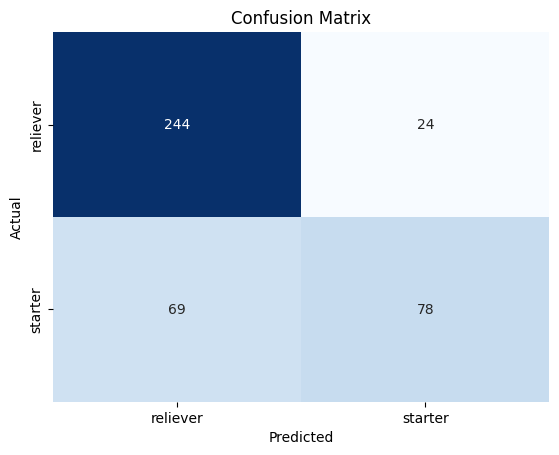

In [276]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_test_hat)
class_labels = sorted(set(y_test))

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [211]:
x23=regression23[['Pitches_Per_Batter', 'Stuff_plus', 'Location_plus', 'num_mix', 'stamina', 'woba_value_L','woba_value_R','woba_mean_runners','woba_mean_empty','Age' ]]

In [212]:
regression23['Predicted']=best_rf_model.predict(x23)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\3392083620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression23['Predicted']=best_rf_model.predict(x23)


In [213]:
regression23[['NameASCII','Assigned_Role', 'Predicted']].loc[regression23['NameASCII']=='Justin Verlander']

,NameASCII,Assigned_Role,Predicted
662,Justin Verlander,starter,starter


KNN

In [279]:
from sklearn import neighbors
import math

In [281]:


# define a KNN classifier
knn_class = neighbors.KNeighborsClassifier(n_neighbors=7)
# fit the classifier on my data
knn_class.fit(X_train,y_train)
# make prediction on training data
y_train_hat = knn_class.predict(X_train)
y_test_hat = knn_class.predict(X_test)
# model accuracy
train_accu = np.average(y_train==y_train_hat)
test_accu = np.average(y_test==y_test_hat)
print('train accuracy score: ', train_accu)
print('test accuracy score: ', test_accu)

train accuracy score:  0.7474120082815735
test accuracy score:  0.6289156626506024


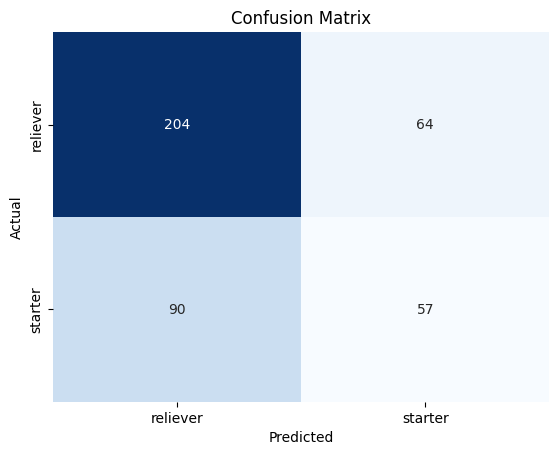

In [282]:
conf_matrix = confusion_matrix(y_test, y_test_hat)

# Display the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_test_hat)
class_labels = sorted(set(y_test))

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logisitic Regression}

In [271]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()

# Train the model on the training data
log_model.fit(X_train, y_train)

y_train_hat = log_model.predict(X_train)
y_test_hat = log_model.predict(X_test)

train_accu = np.average(y_train==y_train_hat)
test_accu = np.average(y_test==y_test_hat)
print('train accuracy score: ', train_accu)
print('test accuracy score: ', test_accu)

train accuracy score:  0.7039337474120083
test accuracy score:  0.6843373493975904


c:\Users\brady\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


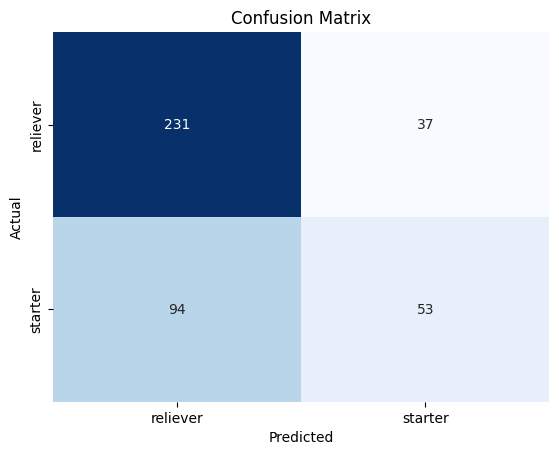

In [272]:
conf_matrix = confusion_matrix(y_test, y_test_hat)

# Display the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_test_hat)
class_labels = sorted(set(y_test))

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Bayesian

In [217]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    f1_score,
)

In [218]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_train_pred = nb_model.predict(X_train)
y_test_pred = nb_model.predict(X_test)
train_accuracy = accuracy_score(y_train_pred, y_train)
test_accuray = accuracy_score(y_test_pred, y_test)
f1_train = f1_score(y_train_pred, y_train, average="weighted")
f1_test = f1_score(y_test_pred, y_test, average="weighted")
print("train accuracy -",train_accuracy)
print("f1 train -",f1_train)
print("test accuracy -",test_accuray)
print("f1 test -",f1_test)

train accuracy - 0.7567287784679089
f1 train - 0.7518537077786736
test accuracy - 0.7566265060240964
f1 test - 0.7532532402378714


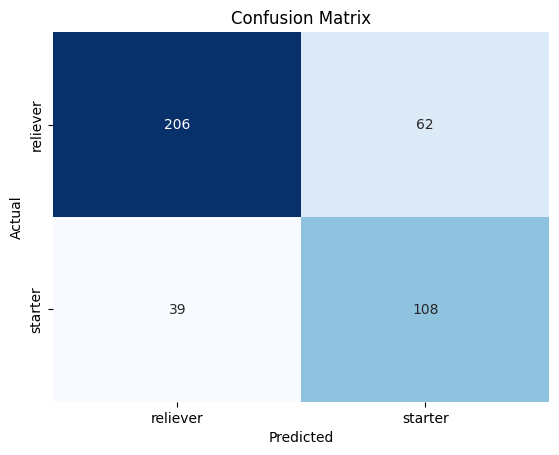

In [219]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_true and y_pred are your true and predicted labels
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_labels = sorted(set(y_test))

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [238]:
regression23['Predicted_Bayes']=nb_model.predict(x23)

C:\Users\brady\AppData\Local\Temp\ipykernel_34880\4069866862.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regression23['Predicted_Bayes']=nb_model.predict(x23)


In [270]:
regression23[['NameASCII','Assigned_Role', 'Predicted', 'Predicted_Bayes']].loc[regression23['NameASCII']=='Hunter Greene']

,NameASCII,Assigned_Role,Predicted,Predicted_Bayes
663,Hunter Greene,starter,reliever,reliever


In [242]:
regression23[['NameASCII','Assigned_Role', 'Predicted', 'Predicted_Bayes']].loc[regression23['Predicted']!=regression23['Predicted_Bayes']]

,NameASCII,Assigned_Role,Predicted,Predicted_Bayes
0,Tommy Hunter,reliever,reliever,starter
19,Collin McHugh,reliever,reliever,starter
22,Bryan Shaw,reliever,reliever,starter
32,Vince Velasquez,starter,reliever,starter
69,Chris Stratton,reliever,reliever,starter
...,...,...,...,...
683,Max Fried,starter,reliever,starter
688,Kyle Freeland,starter,reliever,starter
690,Framber Valdez,starter,reliever,starter
694,Nick Lodolo,starter,starter,reliever


ADA Boost

In [220]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [221]:
abc = AdaBoostClassifier(SVC(probability=True, kernel='linear'),n_estimators=50,learning_rate=.005,algorithm='SAMME.R')
abc_model = abc.fit(X_train, y_train)

y_train_pred = abc_model.predict(X_train)
y_test_pred = abc_model.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test,y_test_pred)

print(train_accuracy)
print(test_accuracy)

c:\Users\brady\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


0.6863354037267081
0.6457831325301204


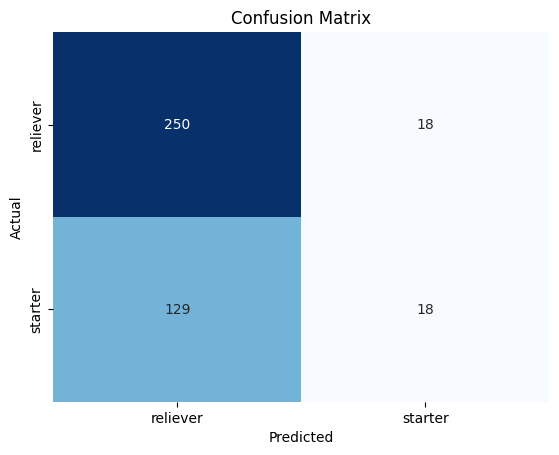

In [222]:
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_test_pred)
class_labels = sorted(set(y_test))

# Display the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels=class_labels, yticklabels=class_labels)

plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Ensemble

In [151]:
x23.shape[0]

703

In [ ]:
def ensemble(model1, model2, model3, model4, model5, x_data, comparison):
    pred1=model1.predict(x_data)
    pred2=model2.predict(x_data)
    pred3=model3.predict(x_data)
    pred4=model4.predict(x_data)
    pred5=model5.predict(x_data)
    predicted_role=[]
    for num in range(0,x_data.shape[0]):
        votes=[pred1[num],pred2[num],pred3[num],pred4[num],pred5[num]]
        chosen_role=max(set(votes), key=votes.count)
    comparison['predicted_role']=predicted_role
    


In [233]:
def ensemble_test(model1, model2,  x_data, comparison):
    pred1=model1.predict(x_data)
    pred2=model2.predict(x_data)
    
    
    predicted_role=[]
    for num in range(0,x_data.shape[0]):
        votes=[pred1[num],pred2[num]]
        chosen_role=max(set(votes), key=votes.count)
        predicted_role.append(chosen_role)
    accuracy = np.average(y_test==predicted_role)
    return accuracy
    

In [235]:
ensemble_test( nb_model, abc_model, X_test, y_test)

0.7566265060240964